In [169]:
#Machine Learning Model 1 - Recommendation system for GeoFree based on other item text

#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#import mock dataset with fields corresponding to GeoFree backend database
#df_geofree = pd.read_csv("MOCK_DATA_ML1000.csv")
df_geofree = pd.read_csv("MOCK_DATA_ML1000_test.csv")
#df_geofree.head(50)

df_geofree ["description"]

tfidf = TfidfVectorizer(stop_words="english")

#vector space model, basic tfid matrix
tfidf_matrix = tfidf.fit_transform(df_geofree["description"])

#create reference of each description with other descriptions
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#output should be the link to the other description, remove duplicates if similar items are posted
the_output = pd.Series(df_geofree.index, index=df_geofree["title"]).drop_duplicates()
#the_output

#Algorithm function
def get_the_recommendation(title, cosine_sim = cosine_sim):
    
    idx = the_output[title]
    #add the index of the recommended return
    sim_scores = enumerate(cosine_sim[idx])
    #sort the answers with closest match first
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #we only need 5 GeoFree recommendations, so only return top 5. Disregard first one as this is always the original item title
    sim_scores_clipped = sim_scores[1:6]
    
    #loop through the answer descriptions and return index and score
    #for y in sim_scores:
    #    print(y)
    sim_index = [i[0] for i in sim_scores_clipped]
    #print(sim_scores)
    #print(df_geofree)
    
    df2 = pd.DataFrame(sim_scores)
    
    #df2.rename({"0": "ID", "1": "title"}, axis = "columns", inplace = True)
    
    df2.to_csv("simscores.csv")
    
    #sns.lmplot(x='x-as', y='title', data=df2)
    #df2.plot(kind='scatter', x='x-as', y='title')
    #plt.show()
    
    
    #return item title 
    print(f"Since you looked at {title}, you might be interested in the following items:")
    print("")
    print(df_geofree["title"].iloc[sim_index])
    
#test the algorithm function
get_the_recommendation("Test3")

Since you looked at Test3, you might be interested in the following items:

7                    TestFinal with space
14                                  Test1
8              Extended background policy
17              Adaptive neutral solution
35    Profound methodical functionalities
Name: title, dtype: object


Additional assignment 1: Further analysis of the TF/IDF matches on our GeoFree test file:

Min value of data is  0.0 

Max value of data is  1.0 

Mean value of data is  0.08660921635870167 

Median value of data is  0.0 



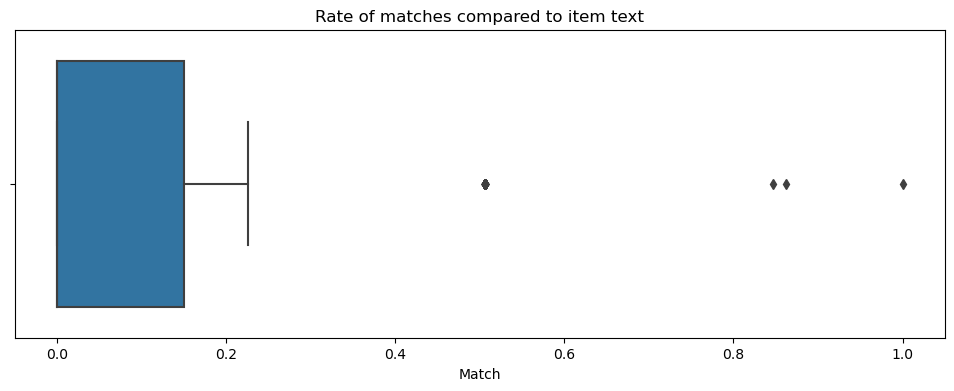

A first analysis and BoxPlot shows that the data matching is concentrated mainly around the 0.0-0.18 range.
We determine that a threshold value of at least 0.5 has to be reached in order to produce a significant result for relevance of the suggestion returned to our customer. We are applying our threshold in the next graph


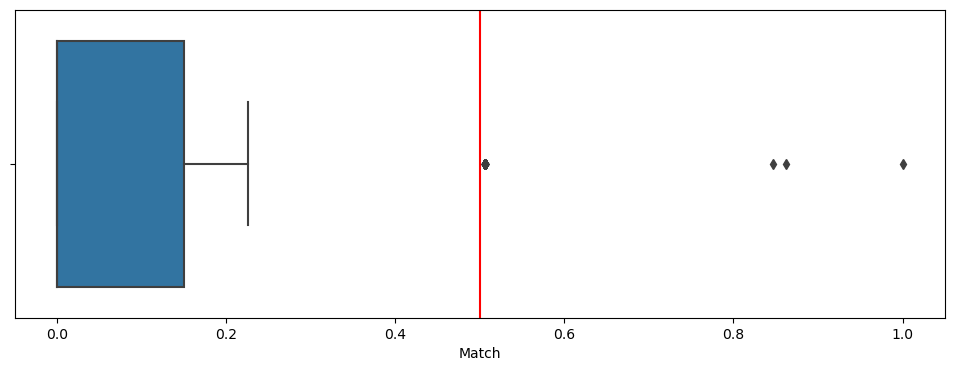

<class 'pandas.core.series.Series'>
Int64Index: 85 entries, 0 to 84
Series name: Match
Non-Null Count  Dtype  
--------------  -----  
85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB

We received 85 matches above our 0.5 threshold out of 1000 records, meaning that on the testset only 8.5 % of useful replies were found.

    ID Number     Match
0          38  1.000000
1           7  0.862553
2          14  0.847067
3           8  0.505966
4          17  0.505966
..        ...       ...
80        867  0.505966
81        919  0.505966
82        921  0.505966
83        963  0.505966
84        972  0.505966

[85 rows x 2 columns]
A further analysis by scatterplot of the dataset gives away that all values apart from the first 3, which are those that were manually edited to represent the target word, all return the same value. This makes the dataset very unambiguous


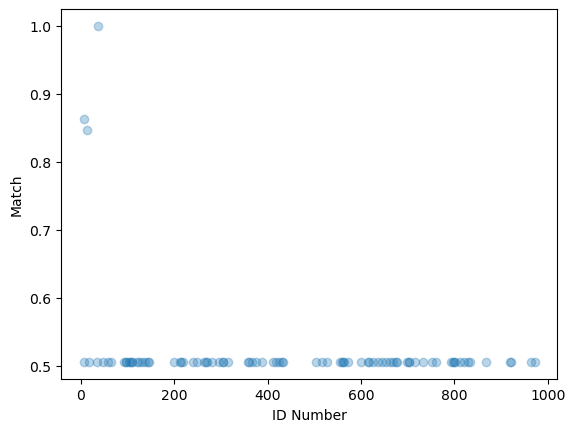

In [224]:
#Assignment 1: set a threshold and do data analysis on the outcomes.

test = pd.read_csv("simscores.csv", index_col=0)
test.rename(columns={"0":"ID Number","1":"Match"}, inplace=True)
#test.drop(columns=["0"], inplace=True)

print("Additional assignment 1: Further analysis of the TF/IDF matches on our GeoFree test file:")

print("\nMin value of data is ", test["Match"].min(),"\n")
print("Max value of data is ", test["Match"].max(),"\n")
print("Mean value of data is ", test["Match"].mean(),"\n")
print("Median value of data is ", test["Match"].median(),"\n")

plt.figure(figsize=(12, 4))
graph = sns.boxplot(x = test["Match"]).set_title("Rate of matches compared to item text")
#graph.axvline(0.5)
#graph.axhline(0.9)
plt.show()

print("A first analysis and BoxPlot shows that the data matching is concentrated mainly around the 0.0-0.18 range.\nWe determine that a threshold value of at least 0.5 has to be reached in order to produce a significant result for relevance of the suggestion returned to our customer. We are applying our threshold in the next graph") 

plt.figure(figsize=(12, 4))
graph2 = sns.boxplot(data=test, x = "Match")
graph2.axvline(0.5, color="red")
plt.show()

df4 = test[test["Match"].between(0.5, 1)]
df4["Match"].info()
amountofmatches = df4["Match"].count()
totalmatches = test["Match"].count()
percentagecount = (amountofmatches/totalmatches)*100

sns.regplot(x="ID Number", y="Match", data=df4, fit_reg=False, scatter_kws={"alpha": 0.3})

print("")
print(f"We received {amountofmatches} matches above our 0.5 threshold out of {totalmatches} records, meaning that on the testset only {percentagecount} % of useful replies were found.\n")

print(df4)

print("A further analysis by scatterplot of the dataset gives away that all values apart from the first 3, which are those that were manually edited to represent the target word, all return the same value. This makes the dataset very unambiguous")



Since you looked at Test3, you might be interested in the following items:

7                    TestFinal with space
14                                  Test1
8              Extended background policy
17              Adaptive neutral solution
35    Profound methodical functionalities
Name: title, dtype: object


Since you looked at Test3, you might be interested in the following items:

7                                   TestFinal with space
14                                                 Test1
64     Re-contextualized context-sensitive infrastruc...
124              Universal asynchronous customer loyalty
215              Business-focused eco-centric encryption
Name: title, dtype: object

The final results are interesting, since the orange line representing the improved matching of test 2, actually shows a less relevant result for the relevance values until about 0.38. This is actually below the 0.5 threshold we had set before for relevance. However, for the remainder of the test results, the improved dataset provides a better result. A possible advice could be here to do more user testing in order to compare relevance results, and look deeper into the dataset for the values where the orange line lies above the blue line test results


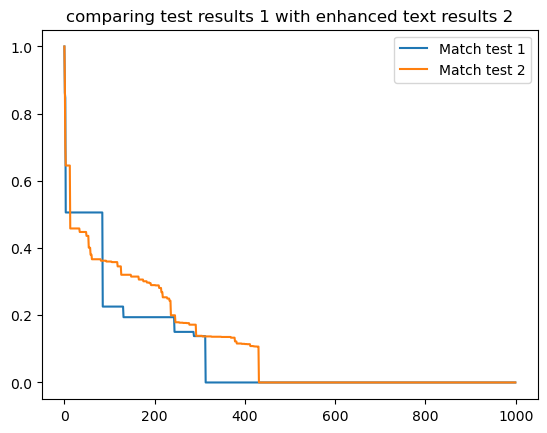

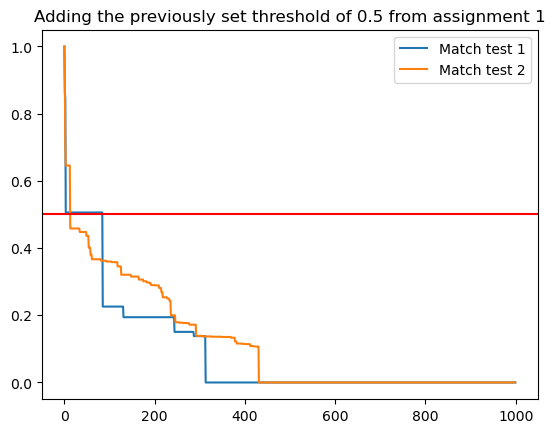

In [217]:
#Assignment 2: Clip string from the category data, and add it to the TF/IDF Vectorizer and evaluate the results against the existing results


#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#import mock dataset with fields corresponding to GeoFree backend database
#df_geofree = pd.read_csv("MOCK_DATA_ML1000.csv")
df_geofree = pd.read_csv("MOCK_DATA_ML1000_test.csv")
#df_geofree.head(50)

tfidf_matrix_2 = tfidf_matrix

#Adding the wording of the category column of the test set to the description field in order to enrich the vectorization.
df_geofree["description"] = df_geofree["description"].astype(str) + " " + df_geofree["category"]

tfidf2 = TfidfVectorizer(stop_words="english")

#vector space model, basic tfid matrix
tfidf_matrix2 = tfidf2.fit_transform(df_geofree["description"])

#create reference of each description with other descriptions
cosine_sim = linear_kernel(tfidf_matrix2, tfidf_matrix2)

#output should be the link to the other description, remove duplicates if similar items are posted
the_output = pd.Series(df_geofree.index, index=df_geofree["title"]).drop_duplicates()
#the_output

#Algorithm function
def get_the_recommendation(title, cosine_sim = cosine_sim):
    
    idx = the_output[title]
    #add the index of the recommended return
    sim_scores2 = enumerate(cosine_sim[idx])
    #sort the answers with closest match first
    sim_scores2 = sorted(sim_scores2, key=lambda x: x[1], reverse=True)
    #we only need 5 GeoFree recommendations, so only return top 5. Disregard first one as this is always the original item title
    sim_scores_clipped = sim_scores2[1:6]
    
    #loop through the answer descriptions and return index and score
    #for y in sim_scores:
    #    print(y)
    sim_index = [i[0] for i in sim_scores_clipped]
    #print(sim_scores)
    #print(df_geofree)
    
    dftest2 = pd.DataFrame(sim_scores2)
    
    #df2.rename({"0": "ID", "1": "title"}, axis = "columns", inplace = True)
    
    dftest2.to_csv("simscores2.csv")
    
    #sns.lmplot(x='x-as', y='title', data=df2)
    #df2.plot(kind='scatter', x='x-as', y='title')
    #plt.show()
    
    #return item title 
    print(f"Since you looked at {title}, you might be interested in the following items:")
    print("")
    print(df_geofree["title"].iloc[sim_index])
    
#test the algorithm function
get_the_recommendation("Test3")

test2 = pd.read_csv("simscores2.csv", index_col=0)
test.rename(columns={"Match":"Match test 1"}, inplace=True)
test2.rename(columns={"0":"ID Number","1":"Match test 2"}, inplace=True)
comparison = pd.concat([test, test2["Match test 2"]], axis=1)

#Show graph of both 
#plt.figure(figsize=(10,5))
comparison.plot(y=["Match test 1","Match test 2"], use_index=True)
plt.title("comparing test results 1 with enhanced text results 2")

comparison.plot(y=["Match test 1","Match test 2"], use_index=True)
plt.title("Adding the previously set threshold of 0.5 from assignment 1")
plt.axhline(y=0.5, color='red', linestyle='-')

print("\nThe final results are interesting, since the orange line representing the improved matching of test 2, actually shows a less relevant result for the relevance values until about 0.38. This is actually below the 0.5 threshold we had set before for relevance. However, for the remainder of the test results, the improved dataset provides a better result. A possible advice could be here to do more user testing in order to compare relevance results, and look deeper into the dataset for the values where the orange line lies above the blue line test results")

title
Monitored directional hub                            0
Mandatory client-server artificial intelligence      1
Open-source national customer loyalty                2
Re-engineered 24 hour complexity                     3
Optimized needs-based function                       4
                                                  ... 
Business-focused cohesive budgetary management     995
Triple-buffered 5th generation capacity            996
Programmable attitude-oriented archive             997
Organic 5th generation throughput                  998
Balanced background support                        999
Length: 1000, dtype: int64

Since you looked at Test3, you might be interested in the following items:

7                    TestFinal with space
14                                  Test1
8              Extended background policy
17              Adaptive neutral solution
35    Profound methodical functionalities
Name: title, dtype: object
